Importing the necessery libraries to read and manipulate the data and to use the Decision Tree model

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

importing and separating the data into features and target, we removed 'Sex' since this categorical data is binary which might not result in good desicion tree

In [2]:
train_df = pd.read_csv("data//train_heart.csv")

x_types = ['Age','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

x = train_df[x_types]
y = train_df[['HeartDisease']]

fixing our non-numeric values in the data

In [3]:
ce_ord = ce.OrdinalEncoder(cols = ['ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
x = ce_ord.fit_transform(x)

clearing the numeric outliers

In [4]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_df[numerical_columns].quantile(0.25)
Q3 = train_df[numerical_columns].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define threshold (e.g., 1.5 times IQR)
threshold = 1.5

# Define the lower and upper bounds
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers = ((train_df[numerical_columns] < lower_bound) | (train_df[numerical_columns] > upper_bound)).any(axis=1)

# Remove outliers
train_df = train_df[~outliers]


splitting the training data to test for the efficiency of the model

In [5]:
x_train, x_test, y_train, y_true = train_test_split(x, y, random_state=104, test_size=0.2)

creating and fitting the Decision tree model with our data. We set max depth to not overfit the model

In [6]:
model = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4, criterion="entropy")
model = model.fit(x_train, y_train)

c:\Users\matej\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


visualization of our Decision Tree

In [7]:
#dot_data = StringIO()
#export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = x_types, class_names=['no','yes'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png(), width = 1500)

testing the model's efficiency by letting it predict on the unseen train data

In [8]:
y_test = model.predict(x_test)
y_true = np.array(y_true).flatten()
print(accuracy_score(y_true,y_test)*100, "%")

87.59689922480621 %


confusion metrix to visualize the efficiency

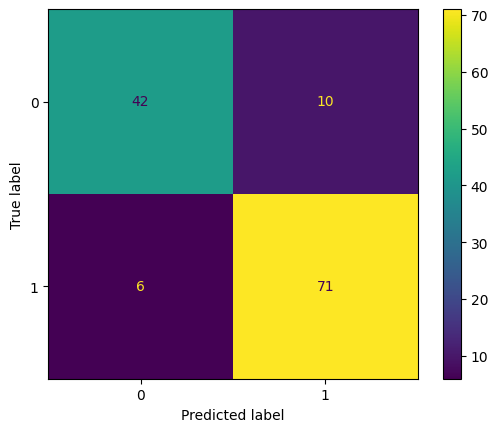

In [9]:
confusion_matrix(y_true, y_test)
ConfusionMatrixDisplay.from_predictions(y_true, y_test, labels=model.classes_)

making an actual prediction on the data for testing using our model

In [10]:
test_df = pd.read_csv("data//test_heart.csv")
test = test_df[x_types]
test = ce_ord.fit_transform(test)

prediction = model.predict(test)

out_df = pd.read_csv("data//sample_submission.csv")

for i,id in enumerate(out_df['id']):
    out_df['HeartDisease'][i] = prediction[i]

out_df.to_csv('output//outputRFC.csv', encoding='utf-8', index=False)